# Walmart Sales EDA

### Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./walmart-sales-dataset-of-45stores.csv",parse_dates = ['Date'])
df.sort_values(by = ['Date'],inplace = True)
df.reset_index(drop = True,inplace = True)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      5 2010-01-10     283178.12             0        71.10       2.603   
1     15 2010-01-10     566945.95             0        59.69       2.840   
2     42 2010-01-10     481523.93             0        86.01       3.001   
3     33 2010-01-10     224294.39             0        91.45       3.001   
4     36 2010-01-10     422169.47             0        74.66       2.567   

          CPI  Unemployment  
0  212.226946         6.768  
1  132.756800         8.067  
2  126.234600         9.003  
3  126.234600         9.265  
4  210.440443         8.476

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### Descriptive Statistics

In [4]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

#### Null values in percentage

In [5]:
df.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

##### No null values in the dataset

#### Checking for duplicates

In [6]:
df.duplicated().sum()

0

##### There is no duplicate values

#### Shape of the dataset

In [7]:
df.shape

(6435, 8)

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

#### Feature Engineering

In [9]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Weekday'] = df.Date.dt.dayofweek

In [10]:
df.Weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace = True)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      5 2010-01-10     283178.12             0        71.10       2.603   
1     15 2010-01-10     566945.95             0        59.69       2.840   
2     42 2010-01-10     481523.93             0        86.01       3.001   
3     33 2010-01-10     224294.39             0        91.45       3.001   
4     36 2010-01-10     422169.47             0        74.66       2.567   

          CPI  Unemployment  Year  Month  Day   Weekday  
0  212.226946         6.768  2010      1   10  Saturday  
1  132.756800         8.067  2010      1   10  Saturday  
2  126.234600         9.003  2010      1   10  Saturday  
3  126.234600         9.265  2010      1   10  Saturday  
4  210.440443         8.476  2010      1   10  Saturday

In [11]:
df['Month_num'] = df.Month

In [12]:
df.Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace = True)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      5 2010-01-10     283178.12             0        71.10       2.603   
1     15 2010-01-10     566945.95             0        59.69       2.840   
2     42 2010-01-10     481523.93             0        86.01       3.001   
3     33 2010-01-10     224294.39             0        91.45       3.001   
4     36 2010-01-10     422169.47             0        74.66       2.567   

          CPI  Unemployment  Year    Month  Day   Weekday  Month_num  
0  212.226946         6.768  2010  January   10  Saturday          1  
1  132.756800         8.067  2010  January   10  Saturday          1  
2  126.234600         9.003  2010  January   10  Saturday          1  
3  126.234600         9.265  2010  January   10  Saturday          1  
4  210.440443         8.476  2010  January   10  Saturday          1

In [13]:
df.Weekday.value_counts()

Thursday     4320
Sunday        495
Wednesday     450
Saturday      405
Monday        405
Friday        270
Tuesday        90
Name: Weekday, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   object        
 10  Day           6435 non-null   int64         
 11  Weekday       6435 non-null   object        
 12  Month_num     6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 653.7+ KB


#### Univariate Analysis

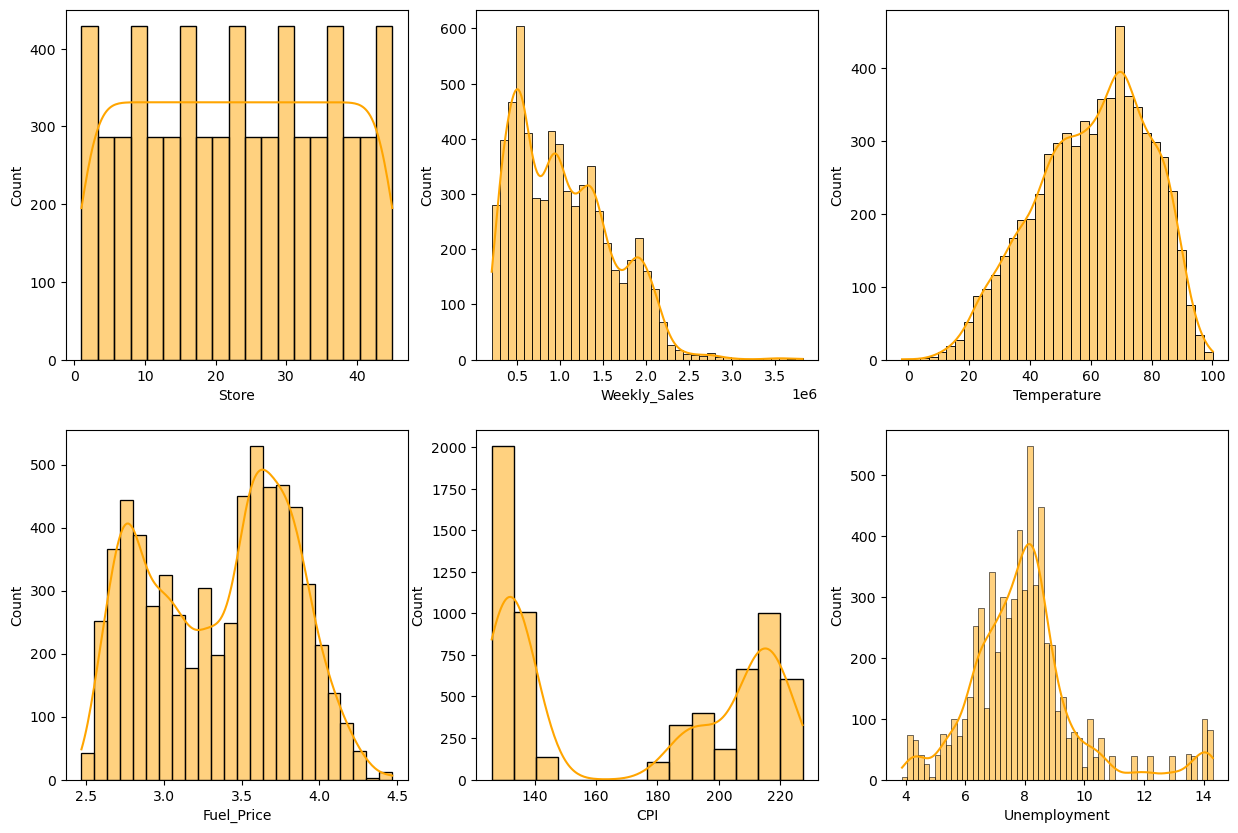

In [15]:
plt.figure(figsize = (15,10))


plt.subplot(2,3,1)
sns.histplot(data = df,x = 'Store',color = 'orange',kde = True)


plt.subplot(2,3,2)
sns.histplot(data = df, x= 'Weekly_Sales',color = 'orange',kde = True)


plt.subplot(2,3,3)
sns.histplot(data = df,x = 'Temperature',color = 'orange',kde = True)

plt.subplot(2,3,4)
sns.histplot(data = df,x = 'Fuel_Price',color = 'orange',kde = True)


plt.subplot(2,3,5)
sns.histplot(data = df,x = 'CPI',color = 'orange',kde = True)


plt.subplot(2,3,6)
sns.histplot(data = df,x = 'Unemployment',color = 'orange',kde = True)


plt.show()

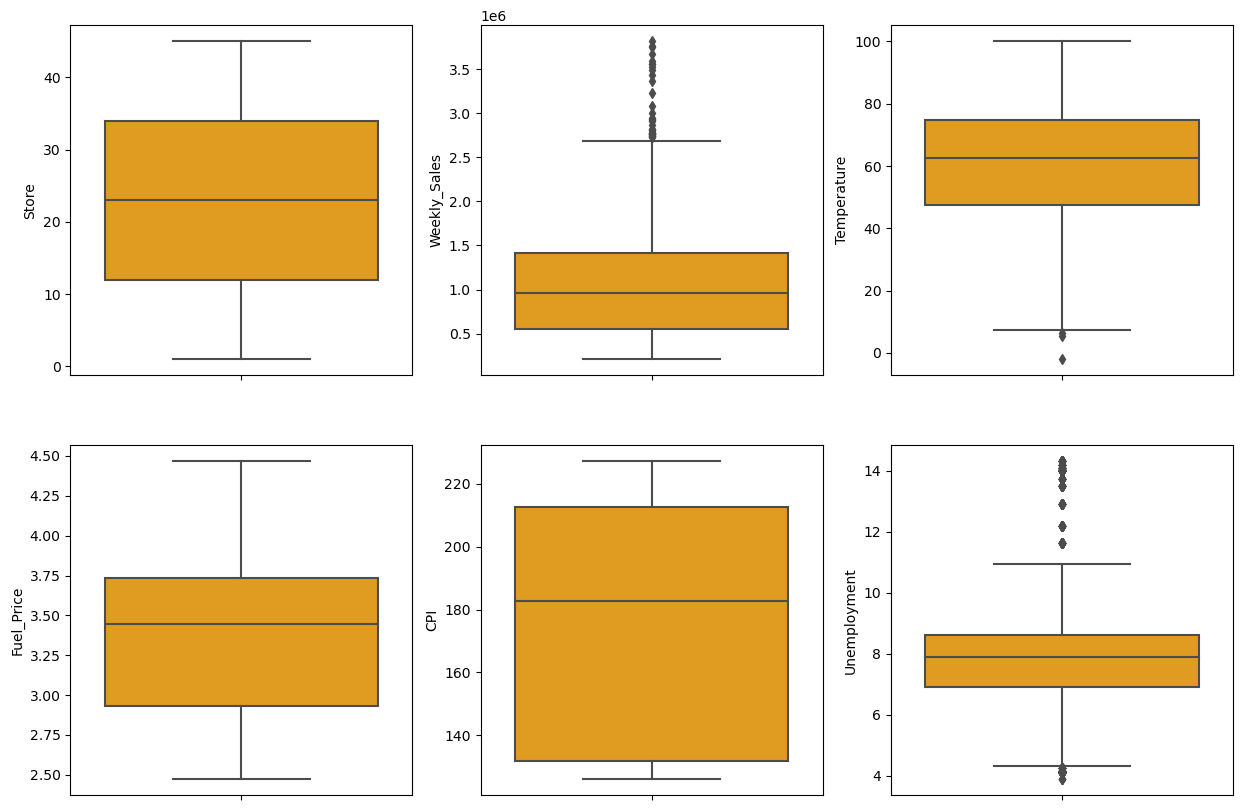

In [16]:
plt.figure(figsize = (15,10))


plt.subplot(2,3,1)
sns.boxplot(data = df,y = 'Store',color = 'orange')



plt.subplot(2,3,2)
sns.boxplot(data=df,y='Weekly_Sales',color='orange')


plt.subplot(2,3,3)
sns.boxplot(data=df,y='Temperature',color='orange')

plt.subplot(2,3,4)
sns.boxplot(data=df,y='Fuel_Price',color='orange')


plt.subplot(2,3,5)
sns.boxplot(data=df,y='CPI',color='orange')


plt.subplot(2,3,6)
sns.boxplot(data=df,y='Unemployment',color='orange')


plt.show()

#### Multivariate Analysis

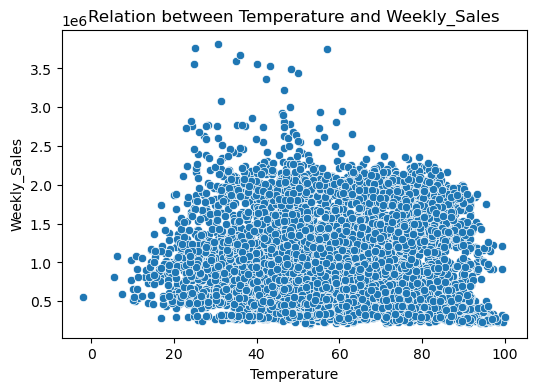

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')
plt.title("Relation between Temperature and Weekly_Sales")
plt.show()

##### There is no relation between Temperature and Weekly Sales.

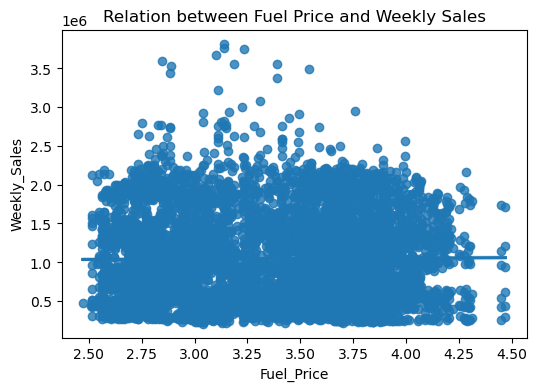

In [18]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Fuel_Price',y='Weekly_Sales')
plt.title("Relation between Fuel Price and Weekly Sales")
plt.show()

##### There is no relation between Fuel Price and Weekly Sales.

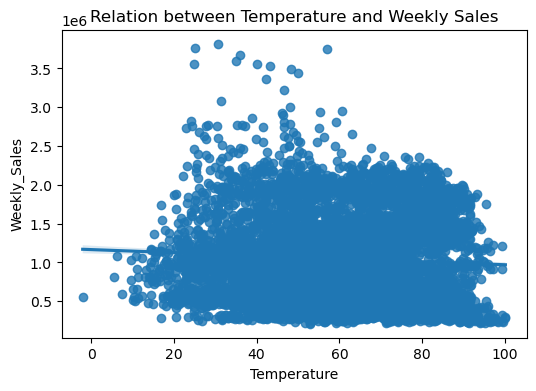

In [19]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Temperature',y='Weekly_Sales')
plt.title("Relation between Temperature and Weekly Sales")
plt.show()

##### There is no correlation between Temperature and Weekly sales.

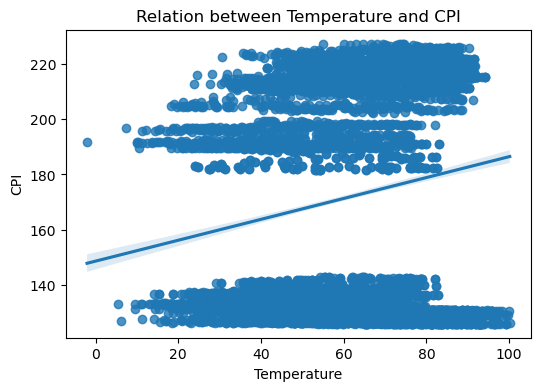

In [20]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Temperature',y='CPI')
plt.title("Relation between Temperature and CPI")
plt.show()

##### Temperature and CPI are weak positively correlated.

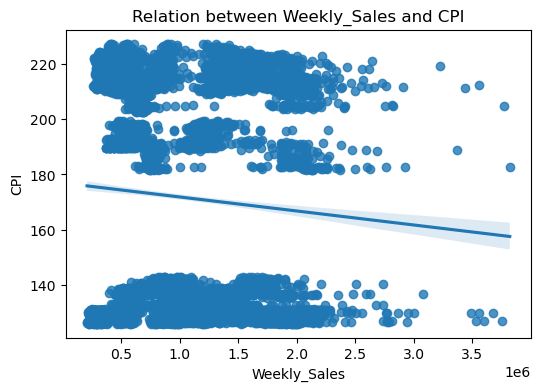

In [21]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Weekly_Sales',y='CPI')
plt.title("Relation between Weekly_Sales and CPI")
plt.show()

##### Weekly sales and CPI are weak negatively correlated.

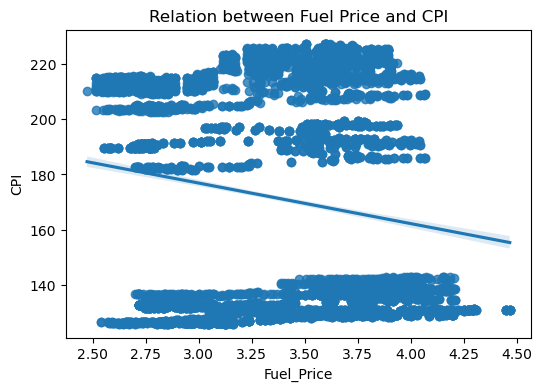

In [22]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Fuel_Price',y='CPI')
plt.title("Relation between Fuel Price and CPI")
plt.show()

##### Fuel price and CPI are weak negatively correlated.

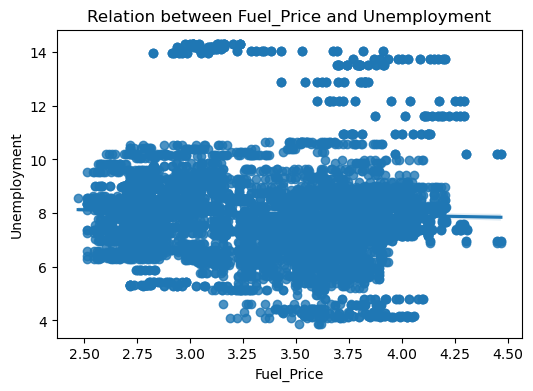

In [23]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Fuel_Price',y='Unemployment')
plt.title("Relation between Fuel_Price and Unemployment")
plt.show()

##### There is no ralation between Fuel price and unemployment.

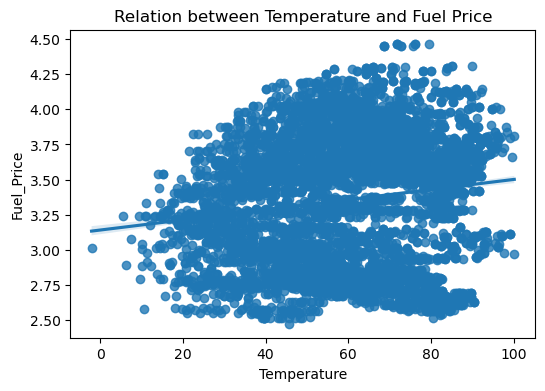

In [24]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Temperature',y='Fuel_Price')
plt.title("Relation between Temperature and Fuel Price")
plt.show()

##### Temperature and Fuel price are slighly positively correlated. 

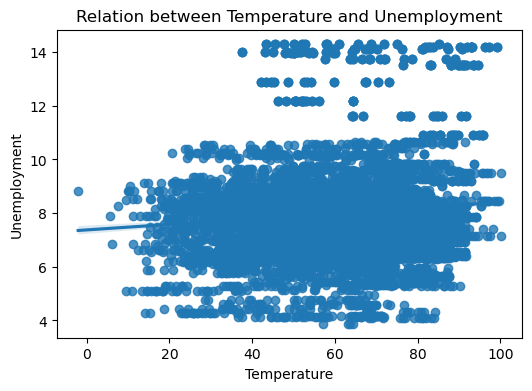

In [25]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Temperature',y='Unemployment')
plt.title("Relation between Temperature and Unemployment")
plt.show()

##### Unemployment is not correlaed to Temperature.

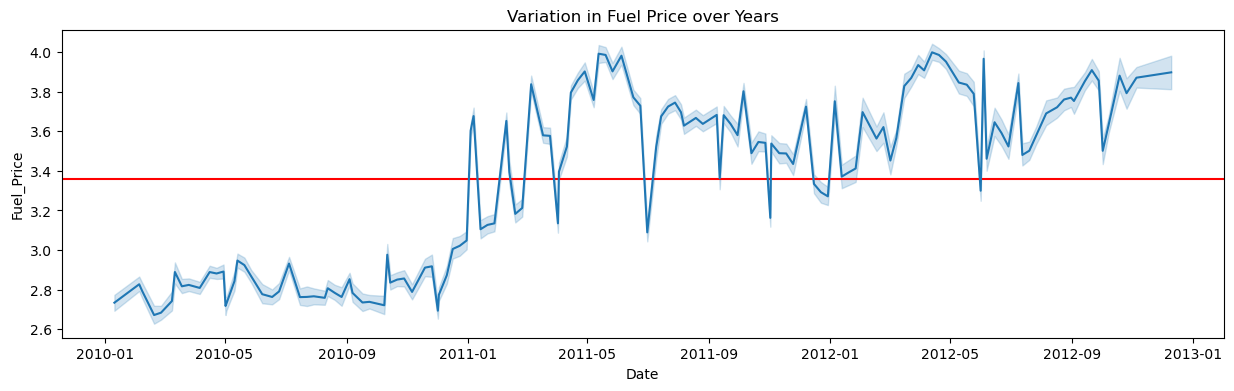

In [26]:
plt.figure(figsize=(15,4))
plt.axhline(y=df.Fuel_Price.mean(),color='r')
sns.lineplot(data=df,x='Date',y='Fuel_Price')
plt.title("Variation in Fuel Price over Years")
plt.show()

##### There is a drastic increase in Fuel price from 2011 onwards.

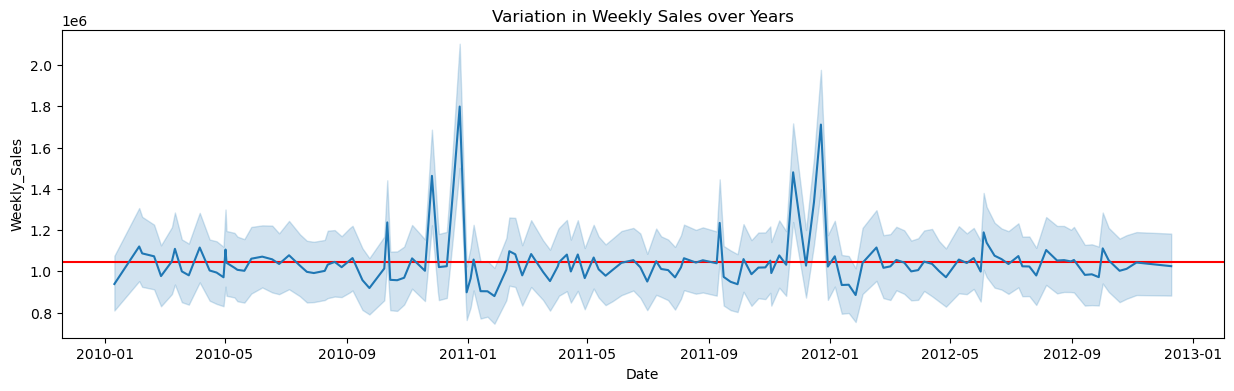

In [27]:
plt.figure(figsize=(15,4))
plt.axhline(y=df.Weekly_Sales.mean(),color='r')
sns.lineplot(data=df,x='Date',y='Weekly_Sales')
plt.title("Variation in Weekly Sales over Years")
plt.show()

##### Towards the end of the year there is an increase in Weekly sales.

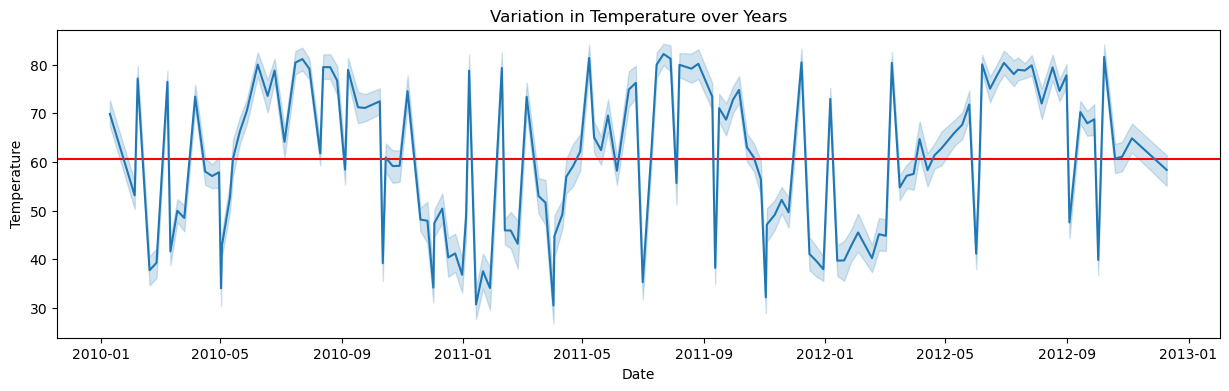

In [28]:
plt.figure(figsize=(15,4))
plt.axhline(y=df.Temperature.mean(),color='r')
sns.lineplot(data=df,x='Date',y='Temperature')
plt.title("Variation in Temperature over Years")
plt.show()

##### Here the Temperature is fluctuating drastically over years.

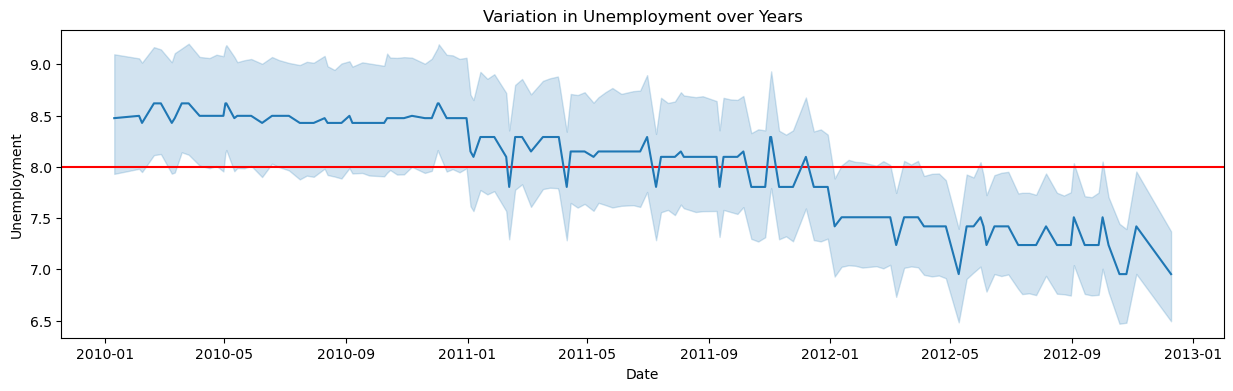

In [29]:
plt.figure(figsize=(15,4))
plt.axhline(y=df.Unemployment.mean(),color='r')
sns.lineplot(data=df,x='Date',y='Unemployment')
plt.title("Variation in Unemployment over Years")
plt.show()

##### Unemployment rate is gradually decreasing over years.

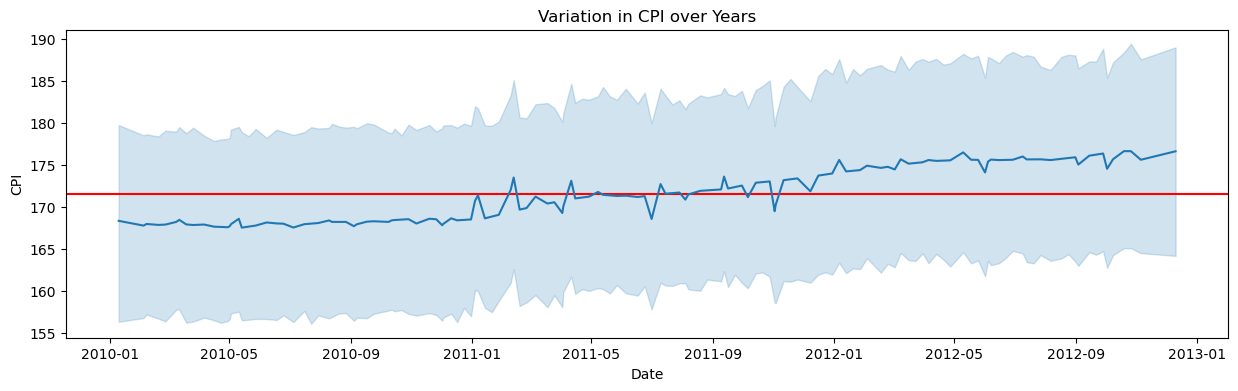

In [30]:
plt.figure(figsize=(15,4))
plt.axhline(y=df.CPI.mean(),color='r')
sns.lineplot(data=df,x='Date',y='CPI')
plt.title("Variation in CPI over Years")
plt.show()

##### CPI is gradually increasing over years.

In [31]:
df.Year.value_counts().index

Int64Index([2011, 2010, 2012], dtype='int64')

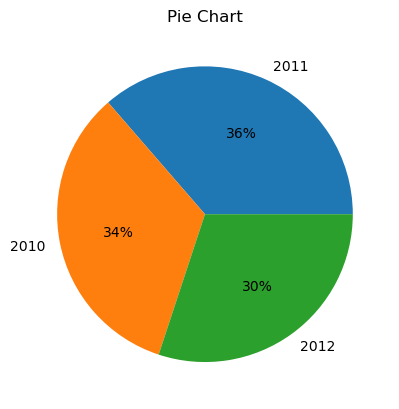

In [32]:
plt.pie(data=df,x=df.Year.value_counts(),labels=[2011, 2010, 2012],autopct='%1.0f%%')
plt.title("Pie Chart")
plt.show()

In [33]:
holiday_sales_average=df.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()
holiday_sales_average

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

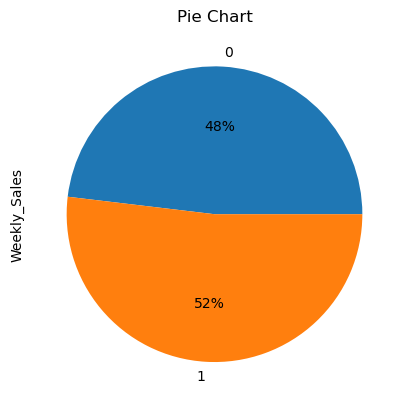

In [34]:
holiday_sales_average.plot.pie(autopct='%1.0f%%');
plt.title("Pie Chart");

##### Mean Weekly sales in Holidays is 52% compared to the non-holidays.

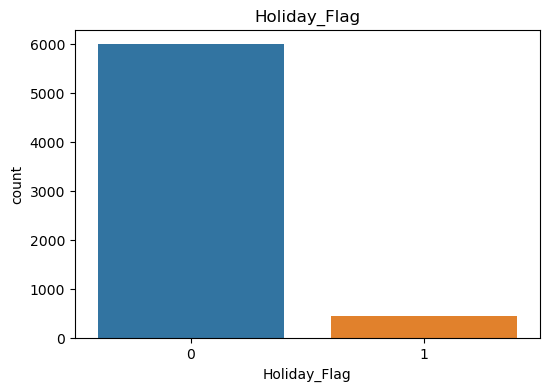

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Holiday_Flag')
plt.title("Holiday_Flag")
plt.show()

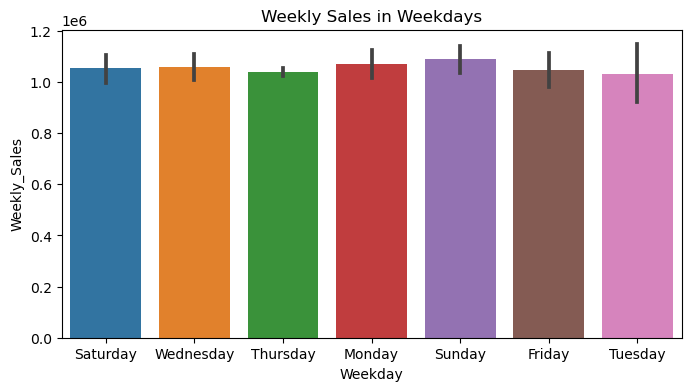

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Weekday',y='Weekly_Sales')
plt.title("Weekly Sales in Weekdays")
plt.show()

##### Average Weekly Sales is high on sundays.

In [37]:
weekday_sales=df.groupby(['Weekday'])['Weekly_Sales'].sum()
weekday_sales

Weekday
Friday       2.824947e+08
Monday       4.335075e+08
Saturday     4.266091e+08
Sunday       5.390133e+08
Thursday     4.486257e+09
Tuesday      9.271282e+07
Wednesday    4.766244e+08
Name: Weekly_Sales, dtype: float64

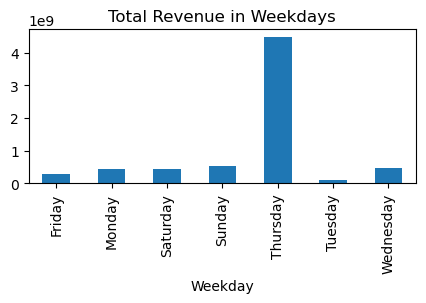

In [38]:
weekday_sales.plot.bar(figsize=(5,2))
plt.title("Total Revenue in Weekdays");

##### Total weekly sales is high in  Thursdays.

In [39]:
df.Weekday.value_counts().index

Index(['Thursday', 'Sunday', 'Wednesday', 'Saturday', 'Monday', 'Friday',
       'Tuesday'],
      dtype='object')

In [40]:
weekday_sales=df.groupby(['Weekday'])['Weekly_Sales'].sum()

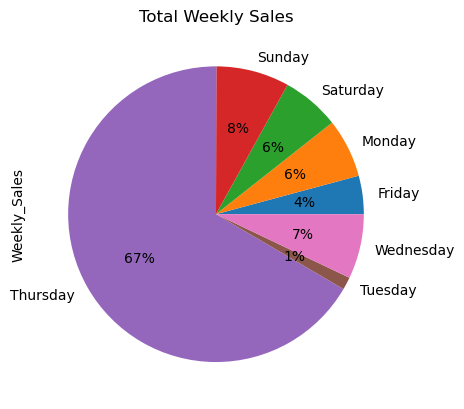

In [41]:
weekday_sales.plot.pie(autopct='%1.0f%%')
plt.title("Total Weekly Sales");

##### 67% of total Weekly sales are on Thursday.

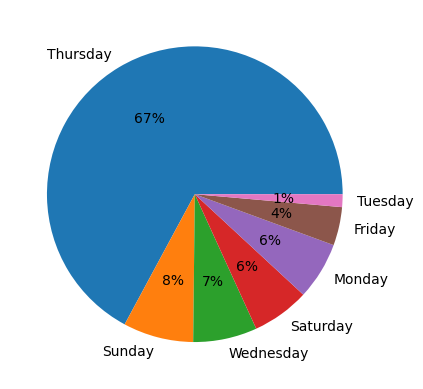

In [42]:
plt.pie(data=df,x=df.Weekday.value_counts(),labels=['Thursday', 'Sunday', 'Wednesday', 'Saturday', 'Monday', 'Friday',
       'Tuesday'],autopct='%1.0f%%')
plt.show()

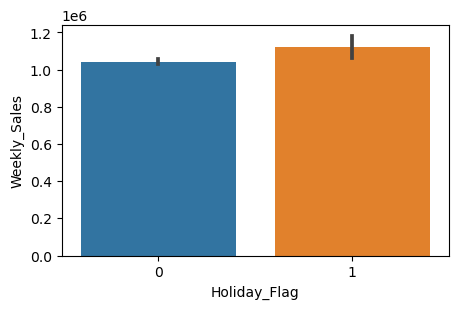

In [43]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='Holiday_Flag',y='Weekly_Sales')
plt.show()

##### Average Weekly sales is high in Holidays.

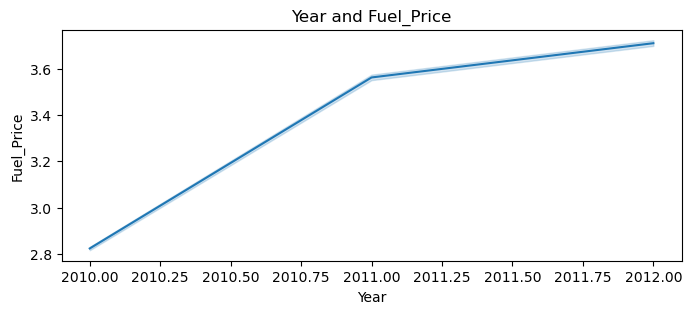

In [44]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='Year',y='Fuel_Price')
plt.title("Year and Fuel_Price")
plt.show()

##### Fuel price is constantly increasing over years.

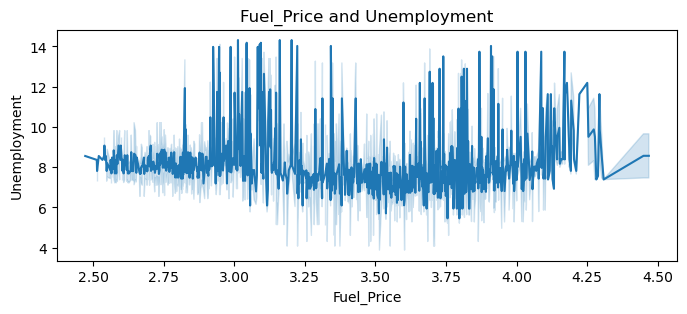

In [45]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='Fuel_Price',y='Unemployment')
plt.title("Fuel_Price and Unemployment")
plt.show()

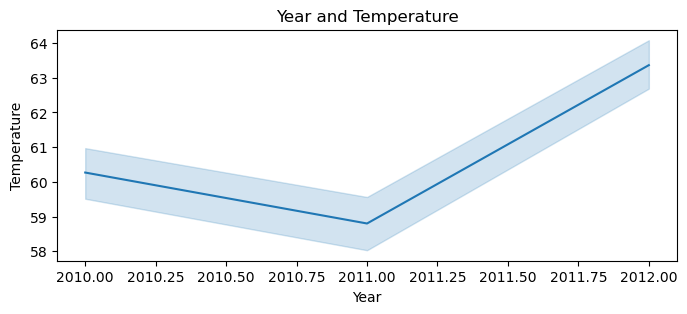

In [46]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='Year',y='Temperature')
plt.title("Year and Temperature")
plt.show()

##### From 2010 to 2011 there were a decrease in Temperature. From 2011 onwards Temperture is increasing.

In [47]:
weekly_sales_over_years=df.groupby(['Year'])['Weekly_Sales'].sum()

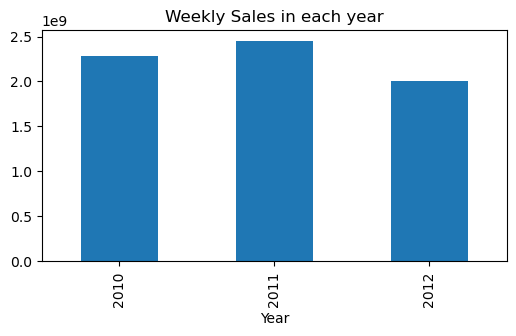

In [48]:
weekly_sales_over_years.plot.bar(figsize=(6,3))
plt.title("Weekly Sales in each year");

##### Total Weekly sales was high in 2011 compared to 2010 and 2012.

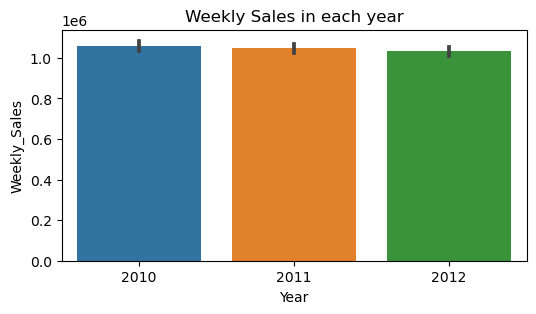

In [49]:
plt.figure(figsize=(6,3))
sns.barplot(data=df,x='Year',y='Weekly_Sales')
plt.title("Weekly Sales in each year")
plt.show()

##### Average Weekly sales was high in the year 2010.

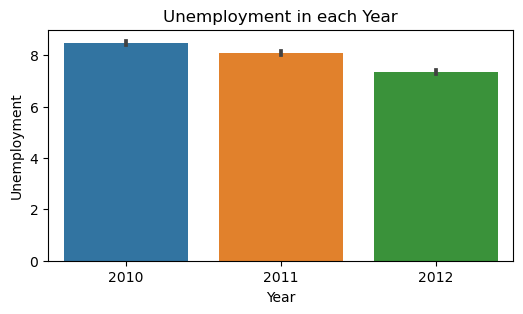

In [50]:
plt.figure(figsize=(6,3))
sns.barplot(data=df,x='Year',y='Unemployment')
plt.title("Unemployment in each Year")
plt.show()

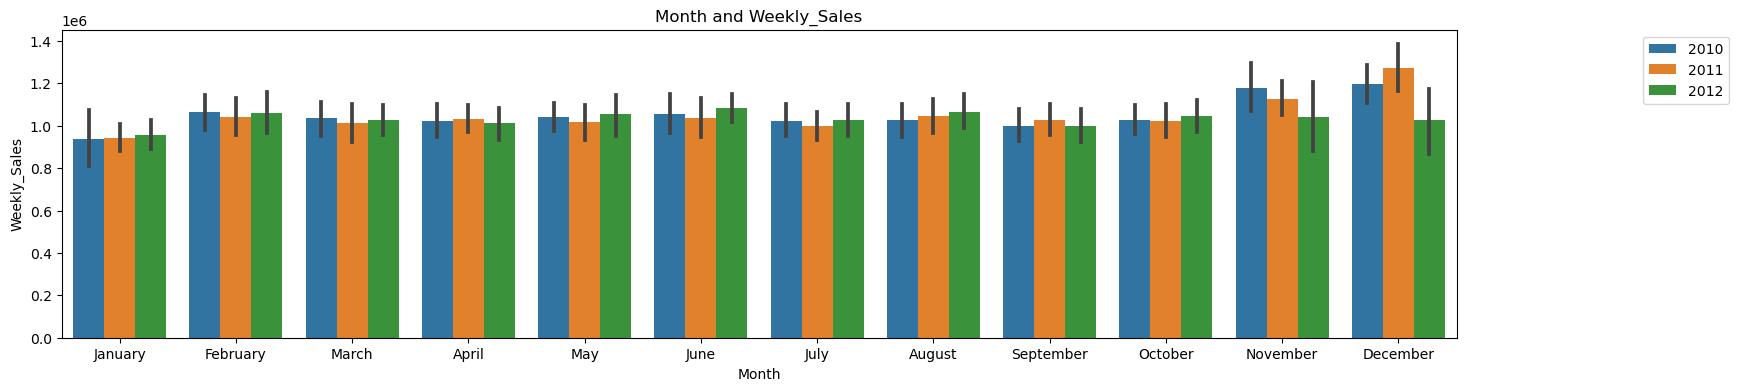

In [51]:
plt.figure(figsize=(18,4))
sns.barplot(data=df,x='Month',y='Weekly_Sales',hue='Year')
plt.title("Month and Weekly_Sales")
plt.legend(bbox_to_anchor=[1.2,1])
plt.show()

##### Average weekly sales was high in December 2011

In [52]:
df.nlargest(1,'Weekly_Sales')

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2072     14 2010-12-24    3818686.45             0        30.59       3.141   

            CPI  Unemployment  Year     Month  Day   Weekday  Month_num  
2072  182.54459         8.724  2010  December   24  Thursday         12

In [53]:
store_sales=df.groupby(['Store'])['Weekly_Sales'].sum()
store_sales.sort_values(ascending=True)
store_sales=store_sales.reset_index()

In [54]:
high_store_sales=store_sales.nlargest(7,'Weekly_Sales')
high_store_sales

Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08

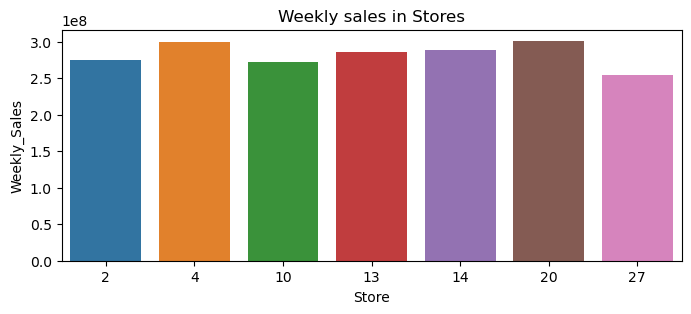

In [55]:
plt.figure(figsize=(8,3))
sns.barplot(data=high_store_sales,x='Store',y='Weekly_Sales')
plt.title("Weekly sales in Stores")
plt.show()

##### Total sales was high in 20th number store.

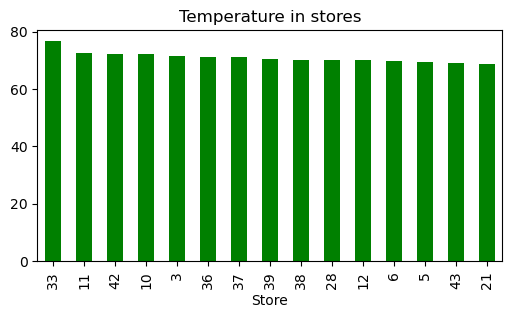

In [56]:
store_temperature=df.groupby(['Store'])['Temperature'].mean()
store_temperature.sort_values(ascending=False)[:15].plot.bar('Store','Temperature',color='green',figsize=(6,3))
plt.title("Temperature in stores");

##### Average Temperature is high in 33th number store compared to other stores. 

In [57]:
df.nlargest(3,'Temperature')

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1070     33 2010-07-16     280937.84             0       100.14       2.971   
6252     33 2012-10-08     297753.49             0       100.07       3.811   
3685     33 2011-08-26     237095.82             0        99.66       3.663   

             CPI  Unemployment  Year    Month  Day   Weekday  Month_num  
1070  126.149806         9.495  2010     July   16  Thursday          7  
6252  130.756161         7.147  2012  October    8    Sunday         10  
3685  129.283258         8.442  2011   August   26  Thursday          8

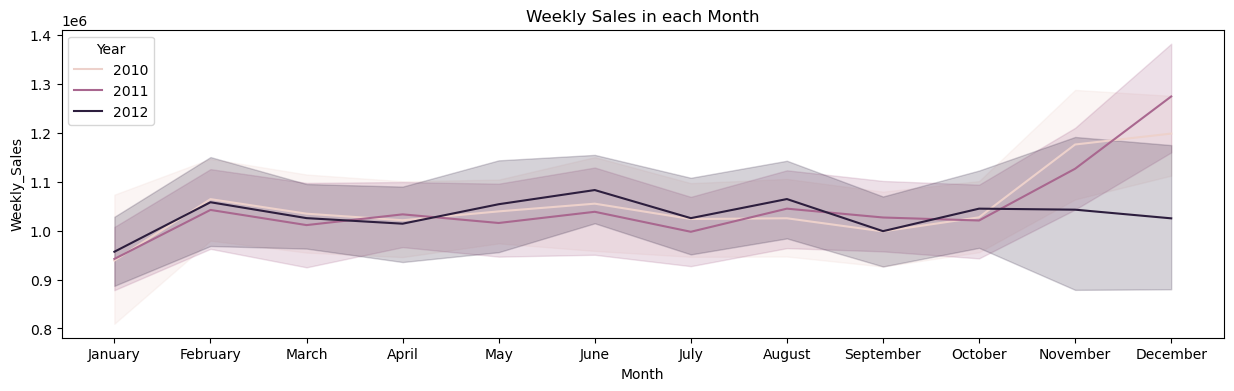

In [58]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df,x='Month',y='Weekly_Sales',hue='Year')
plt.title("Weekly Sales in each Month")
plt.show()

##### Here we can see that towards the end year there is an increase in average Weekly Sales.

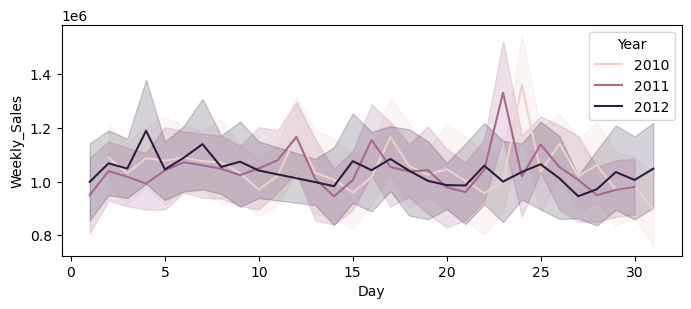

In [59]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='Day',y='Weekly_Sales',hue='Year')
plt.show()

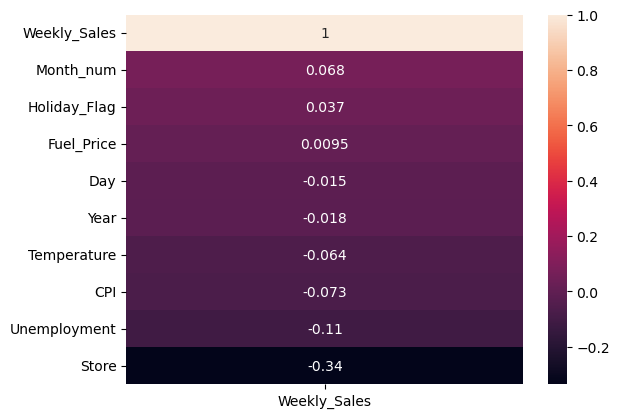

In [60]:
sns.heatmap(df.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False),annot=True)
plt.plot();

In [61]:
yearwise_revenue=df.groupby(['Year'])['Weekly_Sales'].sum()
yearwise_revenue=yearwise_revenue.reset_index()

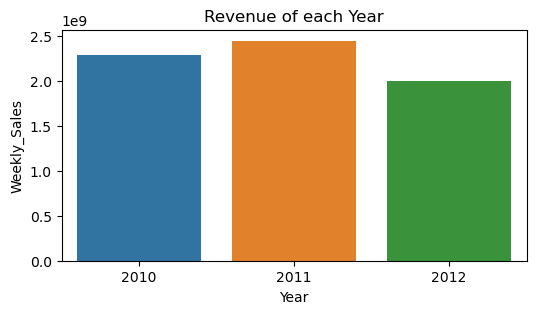

In [62]:
plt.figure(figsize=(6,3))
sns.barplot(data=yearwise_revenue,x='Year',y='Weekly_Sales')
plt.title("Revenue of each Year")
plt.show()

##### Total Weekly sales was high in 2011 compared to 2010 and 

In [63]:
holidays_in_years=df.groupby(['Year'])['Holiday_Flag'].sum()
holidays_in_years=holidays_in_years.reset_index()
holidays_in_years

Year  Holiday_Flag
0  2010           180
1  2011           180
2  2012            90

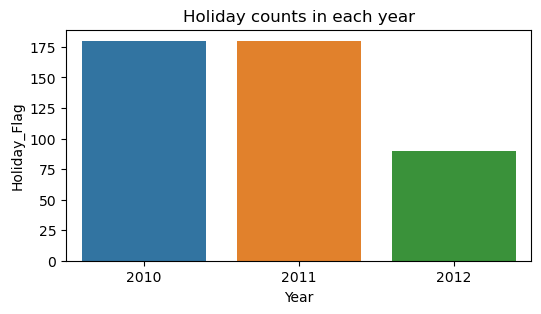

In [64]:
plt.figure(figsize=(6,3))
sns.barplot(data=holidays_in_years,x='Year',y='Holiday_Flag')
plt.title("Holiday counts in each year")
plt.show()

##### Number of holidays in 2010 and 2011 are same.

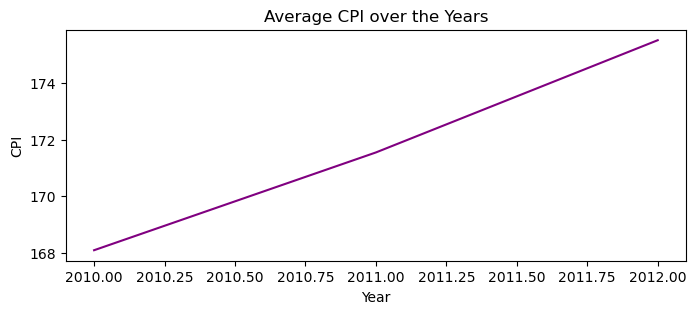

In [65]:
CPI_years=df.groupby(['Year'])['CPI'].mean()
CPI_years=CPI_years.reset_index()
plt.figure(figsize=(8,3))
sns.lineplot(data=CPI_years,x='Year',y='CPI',color='purple')
plt.title("Average CPI over the Years")
plt.show()

##### Average CPI is constantly raising over the years.

In [66]:
monthly_sales=pd.pivot_table(data=df,values='Weekly_Sales',index=['Month_num','Month'],columns='Year')
monthly_sales.sort_values(by='Month_num',inplace=True)
monthly_sales

Year                         2010          2011          2012
Month_num Month                                              
1         January    9.386639e+05  9.420697e+05  9.567817e+05
2         February   1.064372e+06  1.042273e+06  1.057997e+06
3         March      1.034590e+06  1.011263e+06  1.025510e+06
4         April      1.021177e+06  1.033220e+06  1.014127e+06
5         May        1.039303e+06  1.015565e+06  1.053948e+06
6         June       1.055082e+06  1.038471e+06  1.082920e+06
7         July       1.023702e+06  9.976049e+05  1.025480e+06
8         August     1.025212e+06  1.044895e+06  1.064514e+06
9         September  9.983559e+05  1.026810e+06  9.988663e+05
10        October    1.027201e+06  1.020663e+06  1.044885e+06
11        November   1.176097e+06  1.126535e+06  1.042797e+06
12        December   1.198413e+06  1.274311e+06  1.025078e+06

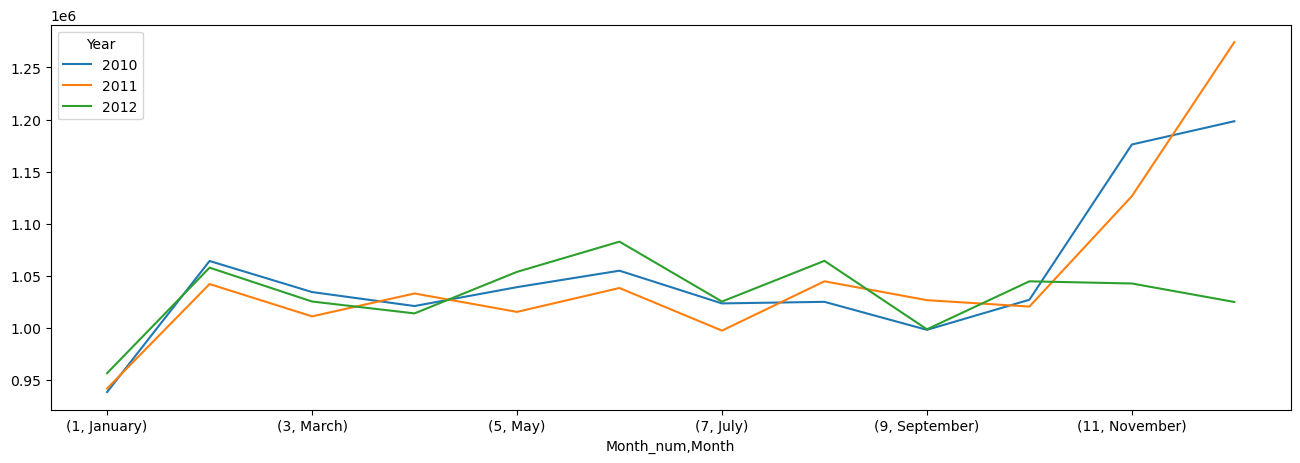

In [67]:
monthly_sales.plot(figsize=(16,5));

In [68]:
year_2010=df[df.Year==2010]
year_2011=df[df.Year==2011]
year_2012=df[df.Year==2012]
year_2010.drop(columns='Year',inplace=True)
year_2011.drop(columns='Year',inplace=True)
year_2012.drop(columns='Year',inplace=True)

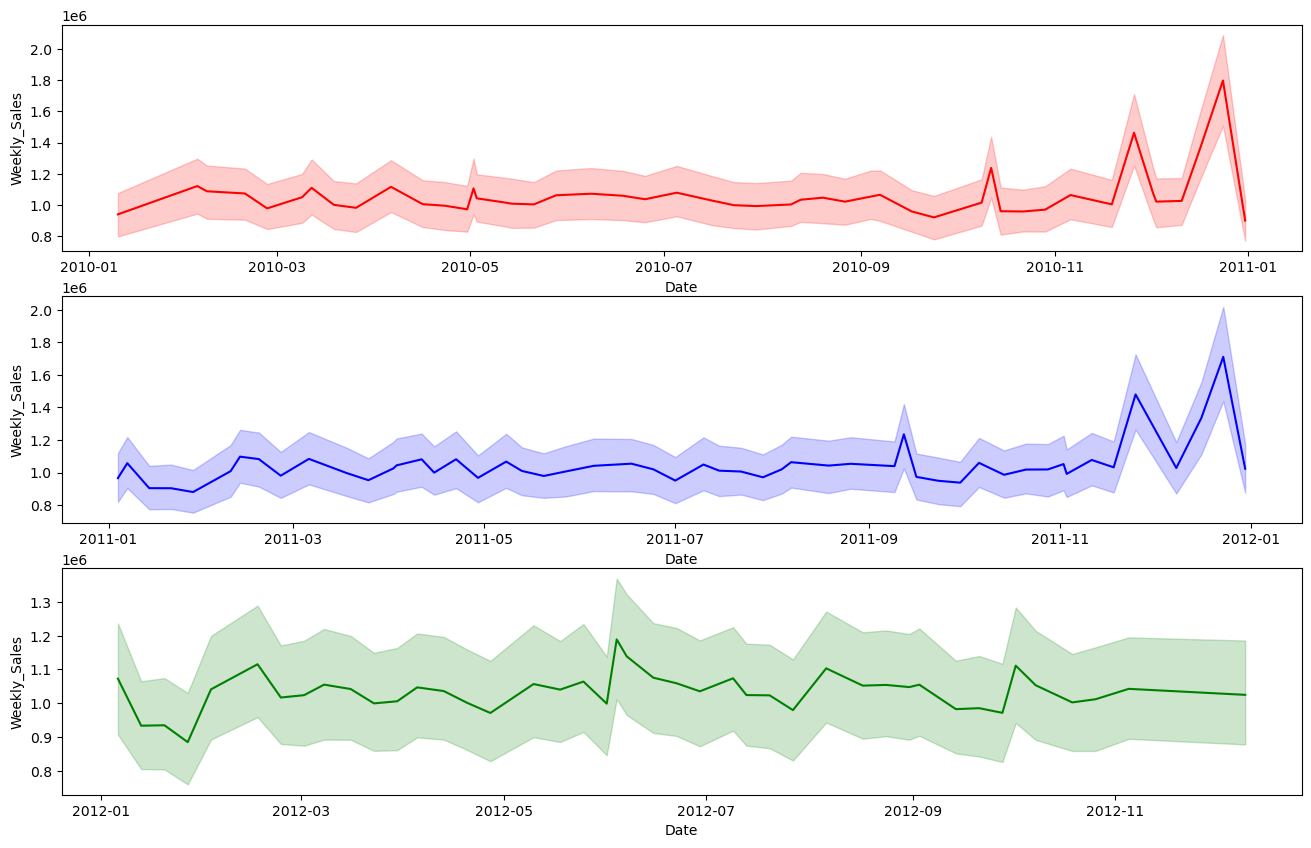

In [69]:
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
sns.lineplot(data=year_2010,x='Date',y='Weekly_Sales',color='r')


plt.subplot(3,1,2)
sns.lineplot(data=year_2011,x='Date',y='Weekly_Sales',color='b')


plt.subplot(3,1,3)
sns.lineplot(data=year_2012,x='Date',y='Weekly_Sales',color='g')


plt.show()

##### The trend of Weekly Sales in the years 2010 and 2011 are similar while the trend in 2012 is different.

In [70]:
yearly_sales_store=df.groupby(['Store','Year'])['Weekly_Sales'].sum()
yearly_sales_store=yearly_sales_store.reset_index()

In [71]:
yearly_sales_store_2010=yearly_sales_store[yearly_sales_store.Year==2010]
yearly_sales_store_2011=yearly_sales_store[yearly_sales_store.Year==2011]
yearly_sales_store_2012=yearly_sales_store[yearly_sales_store.Year==2012]

In [72]:
yearly_sales_store_2010.drop(columns=['Year'],inplace=True)
yearly_sales_store_2011.drop(columns=['Year'],inplace=True)
yearly_sales_store_2012.drop(columns=['Year'],inplace=True)

In [73]:
large5_2010=yearly_sales_store_2010.nlargest(5,'Weekly_Sales')
large5_2010

Store  Weekly_Sales
39     14  1.054622e+08
57     20  1.017331e+08
9       4  9.568047e+07
3       2  9.527786e+07
36     13  9.527274e+07

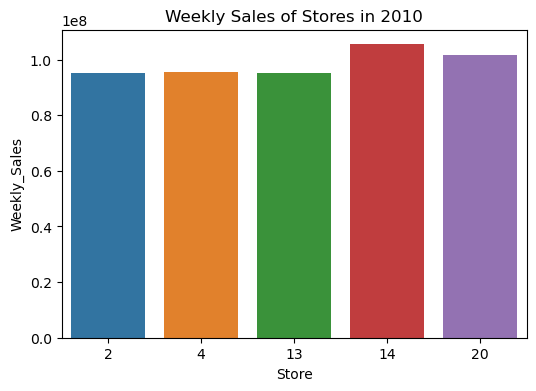

In [74]:
plt.figure(figsize=(6,4))
sns.barplot(data=large5_2010,x='Store',y='Weekly_Sales')
plt.title("Weekly Sales of Stores in 2010")
plt.show()

##### Here we an see the 5 largest average Weekly sales provided stores in the year 2010.

In [75]:
large5_2011=yearly_sales_store_2011.nlargest(5,'Weekly_Sales')
large5_2011

Store  Weekly_Sales
10      4  1.110923e+08
58     20  1.098370e+08
40     14  1.060963e+08
37     13  1.045375e+08
28     10  9.891689e+07

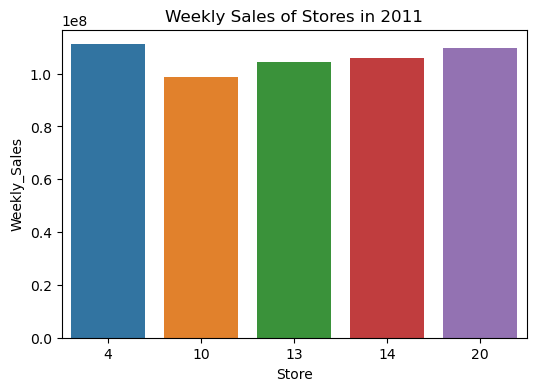

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(data=large5_2011,x='Store',y='Weekly_Sales')
plt.title("Weekly Sales of Stores in 2011")
plt.show()

##### Here we an see the 5 largest average Weekly sales provided stores in the year 2011.

In [77]:
large5_2012=yearly_sales_store_2012.nlargest(5,'Weekly_Sales')
large5_2012

Store  Weekly_Sales
11      4   92771189.24
59     20   89827709.38
38     13   86707455.02
5       2   81496695.37
29     10   78228616.94

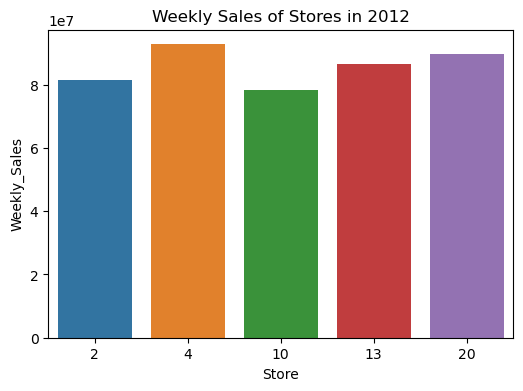

In [78]:
plt.figure(figsize=(6,4))
sns.barplot(data=large5_2012,x='Store',y='Weekly_Sales')
plt.title("Weekly Sales of Stores in 2012")
plt.show()

##### Here we an see the 5 largest average Weekly sales provided stores in the year 2012.

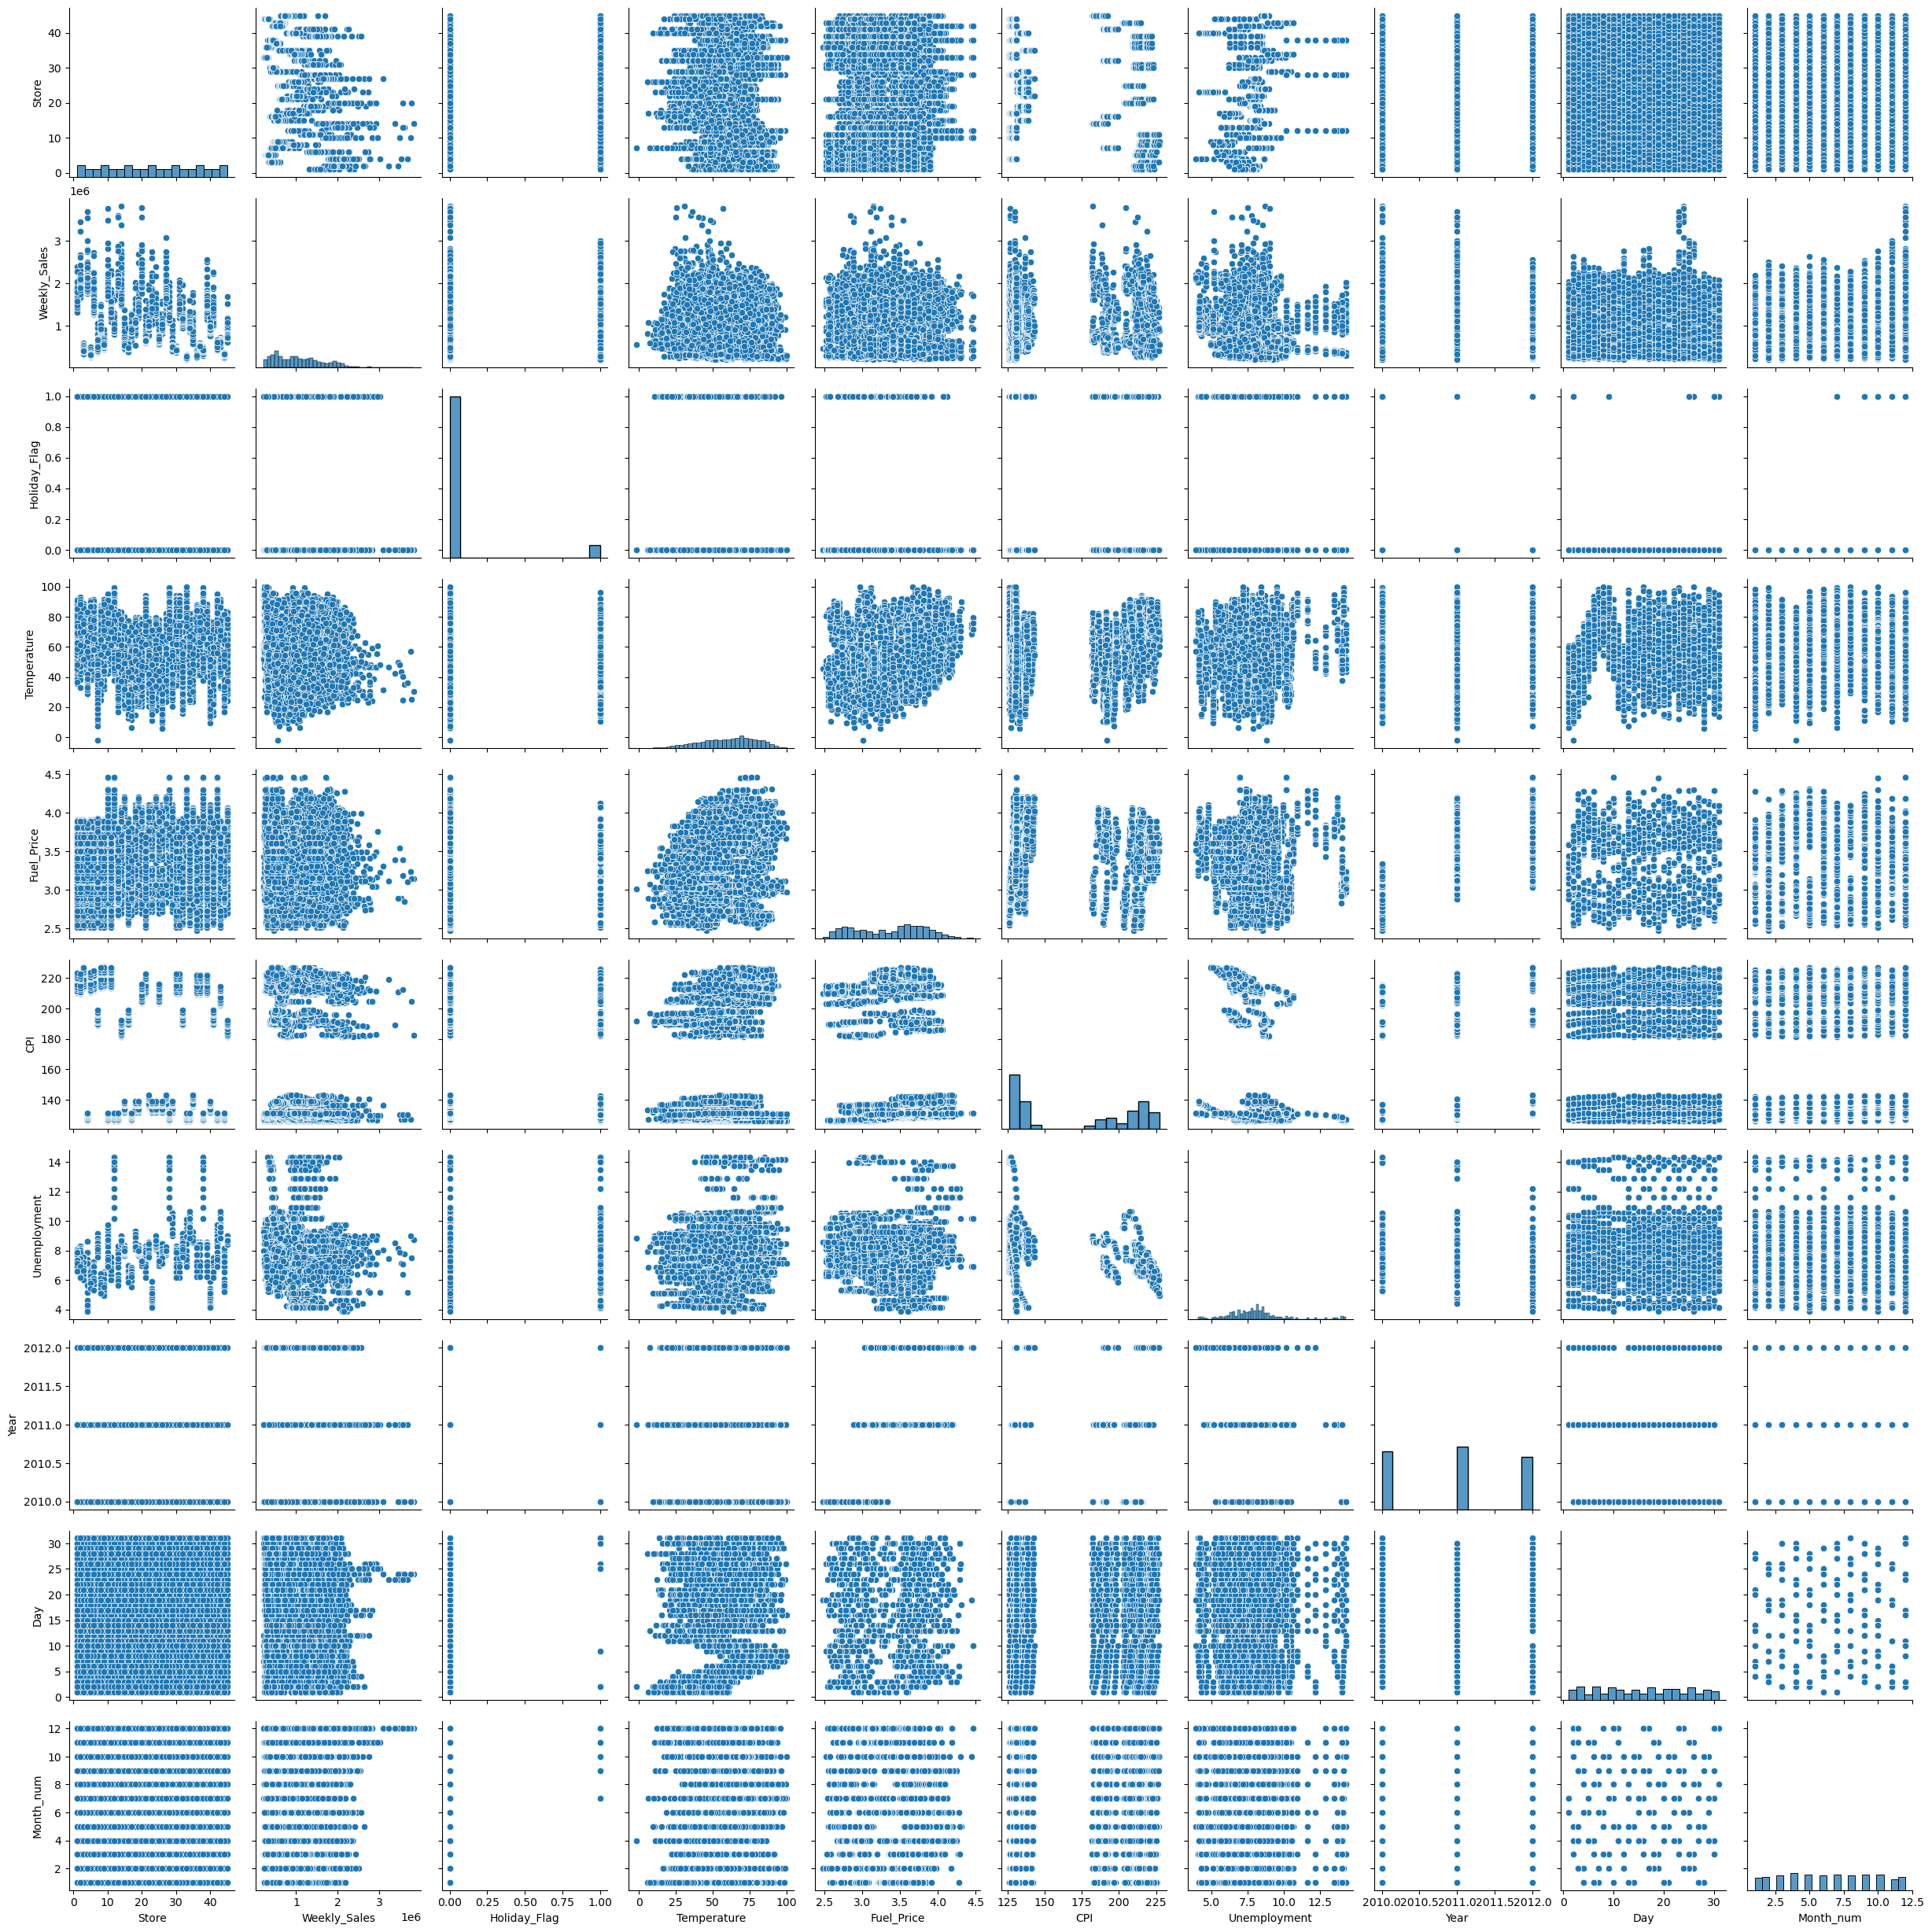

In [79]:
sns.pairplot(data=df)
plt.show()